In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## Preprocessing

In [7]:
df.drop(columns = ['Unnamed: 0'],inplace = True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [10]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [11]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [12]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

df['1080p'] = df['ScreenResolution'].apply(lambda x:1 if '1920x1080' in x else 0)
df['1440p'] = df['ScreenResolution'].apply(lambda x:1 if '2560x1440' in x else 0)
df['2160p'] = df['ScreenResolution'].apply(lambda x:1 if '3840x2160' in x else 0)

In [13]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [14]:
df['X_Res'] = new[0]
df['Y_Res'] = new[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,X_Res,Y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,IPS Panel Retina Display 2560,1600


In [15]:
df['X_Res'] = df['X_Res'].str[-4:]

In [16]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,X_Res,Y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  X_Res             1303 non-null   object 
 13  Y_Res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(1), object(9)
memory usage: 132.5+ KB


In [18]:
df['X_Res'] = df['X_Res'].astype('int')
df['Y_Res'] = df['Y_Res'].astype('int')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  X_Res             1303 non-null   int32  
 13  Y_Res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(1), object(7)
memory usage: 122.3+ KB


Lets calculate PPI - Pixels Per Inch Value as neither Inches nor XRes,YRes are giving good correlation

PPI = sqrt(X^2 + Y^2)/Inches

In [20]:
df['PPI'] = ((((df['X_Res']**2)+(df['Y_Res']**2))**0.5)/df['Inches']).astype('float')

In [21]:
df.drop(columns = ['ScreenResolution','Inches'],inplace = True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,X_Res,Y_Res,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005


In [22]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

We will break Cpu into 5 - i3,i5,i7,Intel Others,AMD Others

In [23]:
df['CPU Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,X_Res,Y_Res,PPI,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel Core i5


In [24]:
def proc_name(name):
    if name=='Intel Core i7' or name=='Intel Core i5' or name=='Intel Core i3':
        return name
    else:
        if name.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
df['CPU Brand'] = df['CPU Name'].apply(proc_name)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,X_Res,Y_Res,PPI,CPU Name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel Core i5,Intel Core i5


In [25]:
df['CPU Brand'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: CPU Brand, dtype: int64

In [26]:
df.drop(columns = ['Cpu','CPU Name'],inplace = True)

In [27]:
df.rename(columns = {'Ram':'RAM'}, inplace = True)

In [28]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [29]:
def mem_assign(mem):
    if '+' in mem:
        new = mem.split(" +  ",1)
        new.append(0)
        new.append(0)
        if 'Hybrid' in new[1]:
            new[2]=new[1]
            new[1]=0
            return new
        elif 'SSD' in new[1]:
            s1 = int(new[0][0:3])
            s2 = int(new[1][0:3])
            s = s1+s2
            new[0] = (str(s)+"GB SSD")
            new[1] = 0
            return new
        elif 'HDD' in new[0]:
            s1 = int(new[0][0:1])
            s2 = int(new[1][0:1])
            s = s1+s2
            new[1] = (str(s)+"TB HDD")
            new[0] = 0
            return new
        elif 'Flash Storage' in new[0]:
            new[3] = new[0]
            new[0] = 0
            return new
        return new
    elif 'SSD' in mem:
        new = [mem,0,0,0]
        return new
    elif 'HDD' in mem:
        new = [0,mem,0,0]
        return new
    elif 'Hybrid' in mem:
        new = [0,0,mem,0]
        return new
    elif 'Flash Storage' in mem:
        new = [0,0,0,mem]
        return new

    
memlist = df['Memory'].apply(mem_assign)

print(type(memlist))
tempm = memlist.to_frame()
print(type(tempm))
tempm

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,Memory
0,"[128GB SSD, 0, 0, 0]"
1,"[0, 0, 0, 128GB Flash Storage]"
2,"[256GB SSD, 0, 0, 0]"
3,"[512GB SSD, 0, 0, 0]"
4,"[256GB SSD, 0, 0, 0]"
...,...
1298,"[128GB SSD, 0, 0, 0]"
1299,"[512GB SSD, 0, 0, 0]"
1300,"[0, 0, 0, 64GB Flash Storage]"
1301,"[0, 1TB HDD, 0, 0]"


In [30]:
m3 = pd.DataFrame(tempm['Memory'].tolist()).fillna('')
m3.sample(5)

,0,1,2,3
509,256GB SSD,1TB HDD,0,0
438,512GB SSD,0,0,0
601,0,500GB HDD,0,0
500,0,0,0,64GB Flash Storage
419,256GB SSD,0,0,0


In [31]:
m3.rename(columns={0: 'SSD',1: 'HDD',2:'Hybrid',3:'Flash Storage'}, inplace=True)
m3.head()

,SSD,HDD,Hybrid,Flash Storage
0,128GB SSD,0,0,0
1,0,0,0,128GB Flash Storage
2,256GB SSD,0,0,0
3,512GB SSD,0,0,0
4,256GB SSD,0,0,0


In [32]:
m3['SSD'].value_counts()

256GB SSD     498
0             460
128GB SSD     172
512GB SSD     138
1TB SSD        16
32GB SSD        6
180GB SSD       5
16GB SSD        3
64GB SSD        1
1024GB SSD      1
768GB SSD       1
240GB SSD       1
8GB SSD         1
Name: SSD, dtype: int64

In [33]:
m3['SSD'] = m3['SSD'].str.replace('GB SSD','')
m3['SSD'] = m3['SSD'].str.replace('TB SSD','000')
m3['SSD'] = m3['SSD'].astype('Int32')
m3['SSD'].value_counts()

256     498
128     172
512     138
1000     16
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: SSD, dtype: Int64

In [34]:
m3['HDD'].value_counts()

0            727
1TB HDD      407
500GB HDD    134
2TB HDD       32
32GB HDD       1
128GB HDD      1
1.0TB HDD      1
Name: HDD, dtype: int64

In [35]:
m3['HDD'] = m3['HDD'].str.replace('GB HDD','')
m3['HDD'] = m3['HDD'].str.replace('1.0TB HDD','1TB HDD')
m3['HDD'] = m3['HDD'].str.replace('TB HDD','000')
m3['HDD'] = m3['HDD'].astype('Int32')
m3['HDD'].value_counts()

C:\Users\Dhruv J\AppData\Local\Temp\ipykernel_3820\3639842860.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  m3['HDD'] = m3['HDD'].str.replace('1.0TB HDD','1TB HDD')


1000    408
500     134
2000     32
32        1
128       1
Name: HDD, dtype: Int64

In [36]:
m3['Hybrid'].value_counts()

0               1291
1.0TB Hybrid      11
508GB Hybrid       1
Name: Hybrid, dtype: int64

In [37]:
m3['Hybrid'] = m3['Hybrid'].str.replace('GB Hybrid','')
m3['Hybrid'] = m3['Hybrid'].str.replace('1.0TB Hybrid','1000')
m3['Hybrid'] = m3['Hybrid'].astype('Int32')
m3['Hybrid'].value_counts()

C:\Users\Dhruv J\AppData\Local\Temp\ipykernel_3820\349862974.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  m3['Hybrid'] = m3['Hybrid'].str.replace('1.0TB Hybrid','1000')


1000    11
508      1
Name: Hybrid, dtype: Int64

In [38]:
m3['Flash Storage'].value_counts()

0                      1228
32GB Flash Storage       38
64GB Flash Storage       16
256GB Flash Storage       8
16GB Flash Storage        7
128GB Flash Storage       4
512GB Flash Storage       2
Name: Flash Storage, dtype: int64

In [39]:
m3['Flash Storage'] = m3['Flash Storage'].str.replace('GB Flash Storage','')
m3['Flash Storage'] = m3['Flash Storage'].astype('Int32')
m3['Flash Storage'].value_counts()

32     38
64     16
256     8
16      7
128     4
512     2
Name: Flash Storage, dtype: Int64

all this processing has left us with a lot of Nan Values - lets fix it

In [40]:
m3

,SSD,HDD,Hybrid,Flash Storage
0,128,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,128
2,256,<NA>,<NA>,<NA>
3,512,<NA>,<NA>,<NA>
4,256,<NA>,<NA>,<NA>
...,...,...,...,...
1298,128,<NA>,<NA>,<NA>
1299,512,<NA>,<NA>,<NA>
1300,<NA>,<NA>,<NA>,64
1301,<NA>,1000,<NA>,<NA>


In [41]:
m3.fillna(0, inplace=True)
m3

,SSD,HDD,Hybrid,Flash Storage
0,128,0,0,0
1,0,0,0,128
2,256,0,0,0
3,512,0,0,0
4,256,0,0,0
...,...,...,...,...
1298,128,0,0,0
1299,512,0,0,0
1300,0,0,0,64
1301,0,1000,0,0


In [42]:
df = df.join(m3)
df.drop(columns = ['Memory'],inplace = True)
df

,Company,TypeName,RAM,Gpu,OpSys,Weight,Price,TouchScreen,X_Res,Y_Res,PPI,CPU Brand,SSD,HDD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel Core i5,256,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1920,1080,157.350512,Intel Core i7,128,0,0,0
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,3200,1800,276.053530,Intel Core i7,512,0,0,0
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,1366,768,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,1366,768,100.454670,Intel Core i7,0,1000,0,0


Due to correlation between Hybrid and Flash Storage with brice being very very low - we drop them

In [43]:
df.drop(columns = ['Hybrid','Flash Storage'],inplace = True)
df.head()

,Company,TypeName,RAM,Gpu,OpSys,Weight,Price,TouchScreen,X_Res,Y_Res,PPI,CPU Brand,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel Core i5,256,0


In [44]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

Lets Split GPUs by Brand

In [45]:
df['GPU Brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df['GPU Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU Brand, dtype: int64

In [46]:
df = df[df['GPU Brand'] != 'ARM']
df['GPU Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: GPU Brand, dtype: int64

In [47]:
df.drop(columns = ['Gpu'],inplace = True)
df.head()

C:\Users\Dhruv J\AppData\Local\Temp\ipykernel_3820\3702319738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Gpu'],inplace = True)


,Company,TypeName,RAM,OpSys,Weight,Price,TouchScreen,X_Res,Y_Res,PPI,CPU Brand,SSD,HDD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel Core i5,256,0,Intel


In [48]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [49]:
def os_name(name):
    if name=='Windows 10' or name=='Windows 7' or name=='Windows 10 S':
        return 'Windows'
    elif name=='macOS' or name=='Mac OS X':
        return 'Mac'
    elif name=='Linux':
        return 'Linux'
    else:
        return 'Other OS'
df['OS Name'] = df['OpSys'].apply(os_name)
df.head()

C:\Users\Dhruv J\AppData\Local\Temp\ipykernel_3820\1404602091.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS Name'] = df['OpSys'].apply(os_name)


,Company,TypeName,RAM,OpSys,Weight,Price,TouchScreen,X_Res,Y_Res,PPI,CPU Brand,SSD,HDD,GPU Brand,OS Name
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel Core i5,256,0,Intel,Other OS
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel Core i5,256,0,Intel,Mac


In [50]:
df.drop(columns = ['OpSys'],inplace = True)
df.head()

C:\Users\Dhruv J\AppData\Local\Temp\ipykernel_3820\183009275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['OpSys'],inplace = True)


,Company,TypeName,RAM,Weight,Price,TouchScreen,X_Res,Y_Res,PPI,CPU Brand,SSD,HDD,GPU Brand,OS Name
0,Apple,Ultrabook,8,1.37,71378.6832,0,2560,1600,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,1440,900,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,1920,1080,141.211998,Intel Core i5,256,0,Intel,Other OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,2880,1800,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,2560,1600,226.983005,Intel Core i5,256,0,Intel,Mac


In [51]:
df.drop(columns = ['X_Res','Y_Res'],inplace = True)
df.head()

C:\Users\Dhruv J\AppData\Local\Temp\ipykernel_3820\260058868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['X_Res','Y_Res'],inplace = True)


,Company,TypeName,RAM,Weight,Price,TouchScreen,PPI,CPU Brand,SSD,HDD,GPU Brand,OS Name
0,Apple,Ultrabook,8,1.37,71378.6832,0,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,141.211998,Intel Core i5,256,0,Intel,Other OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,226.983005,Intel Core i5,256,0,Intel,Mac


## Basic EDA

<AxesSubplot: xlabel='Price', ylabel='Count'>

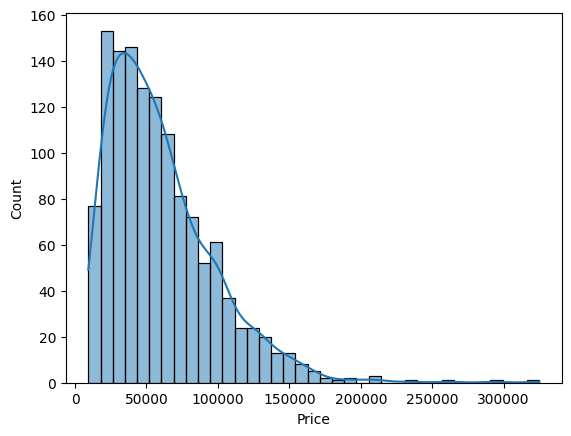

In [52]:
sns.histplot(data = df['Price'], kde = True)

<AxesSubplot: >

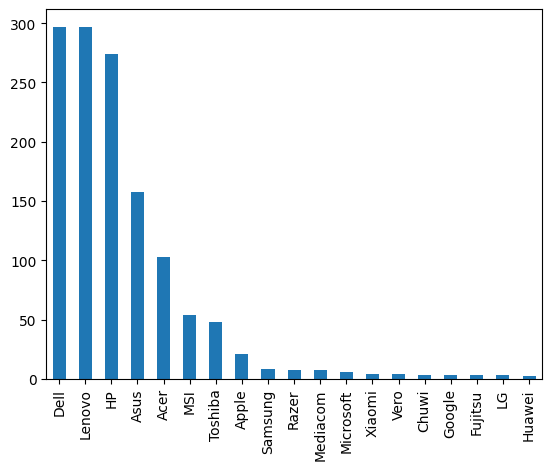

In [53]:
df['Company'].value_counts().plot(kind = 'bar')

[Text(0, 0, 'Apple'),
 Text(1, 0, 'HP'),
 Text(2, 0, 'Acer'),
 Text(3, 0, 'Asus'),
 Text(4, 0, 'Dell'),
 Text(5, 0, 'Lenovo'),
 Text(6, 0, 'Chuwi'),
 Text(7, 0, 'MSI'),
 Text(8, 0, 'Microsoft'),
 Text(9, 0, 'Toshiba'),
 Text(10, 0, 'Huawei'),
 Text(11, 0, 'Xiaomi'),
 Text(12, 0, 'Vero'),
 Text(13, 0, 'Razer'),
 Text(14, 0, 'Mediacom'),
 Text(15, 0, 'Samsung'),
 Text(16, 0, 'Google'),
 Text(17, 0, 'Fujitsu'),
 Text(18, 0, 'LG')]

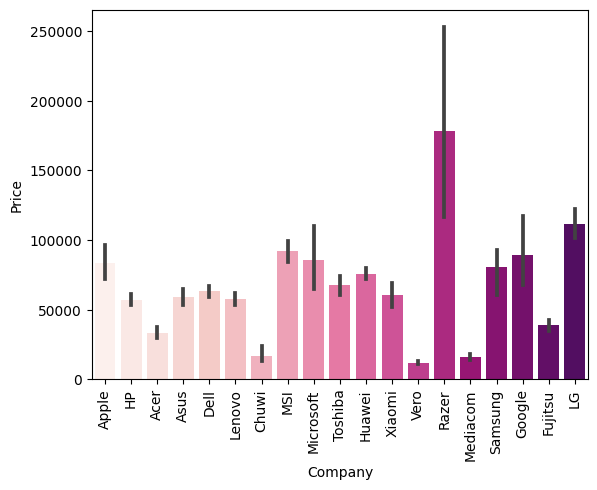

In [55]:
g = sns.barplot(x=df['Company'],y=df['Price'],palette='RdPu')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<AxesSubplot: >

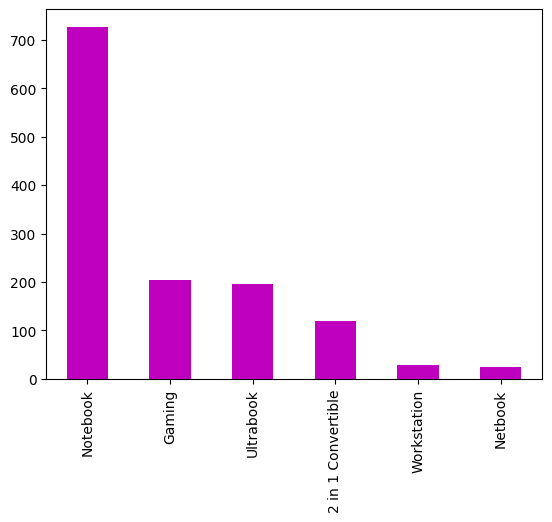

In [56]:
df['TypeName'].value_counts().plot(kind = 'bar',color = 'm')

[Text(0, 0, 'Ultrabook'),
 Text(1, 0, 'Notebook'),
 Text(2, 0, 'Netbook'),
 Text(3, 0, 'Gaming'),
 Text(4, 0, '2 in 1 Convertible'),
 Text(5, 0, 'Workstation')]

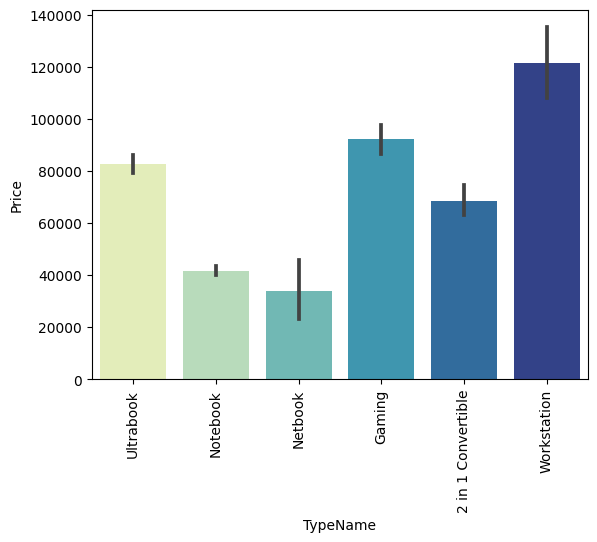

In [57]:
g = sns.barplot(x=df['TypeName'],y=df['Price'],palette='YlGnBu')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<AxesSubplot: >

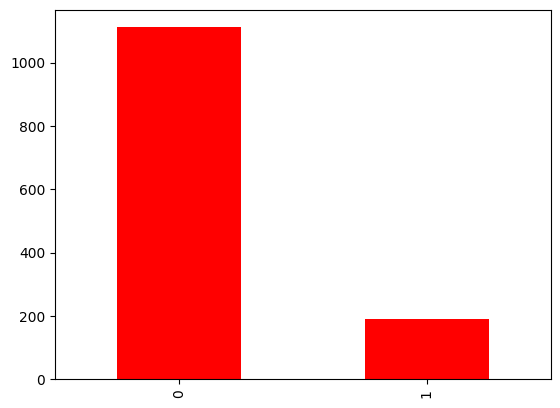

In [59]:
df['TouchScreen'].value_counts().plot(kind = 'bar',color = 'r')

<AxesSubplot: xlabel='TouchScreen', ylabel='Price'>

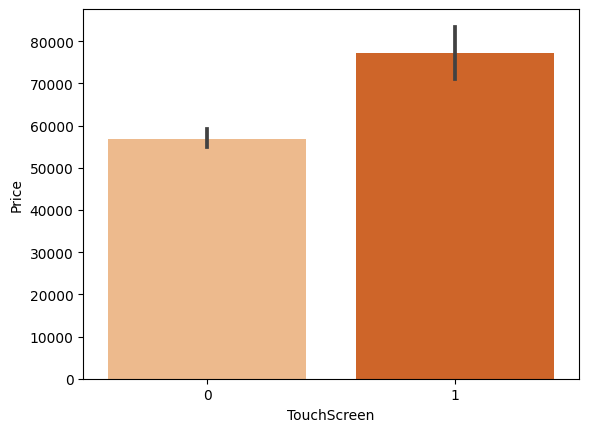

In [60]:
sns.barplot(x=df['TouchScreen'],y=df['Price'],palette='Oranges')

In [61]:
df.corr()['Price']

C:\Users\Dhruv J\AppData\Local\Temp\ipykernel_3820\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


RAM            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
PPI            0.475368
SSD            0.670660
HDD           -0.096891
Name: Price, dtype: float64

In [62]:
df.corr(numeric_only = True)['Price']

RAM            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
PPI            0.475368
SSD            0.670660
HDD           -0.096891
Name: Price, dtype: float64

<AxesSubplot: >

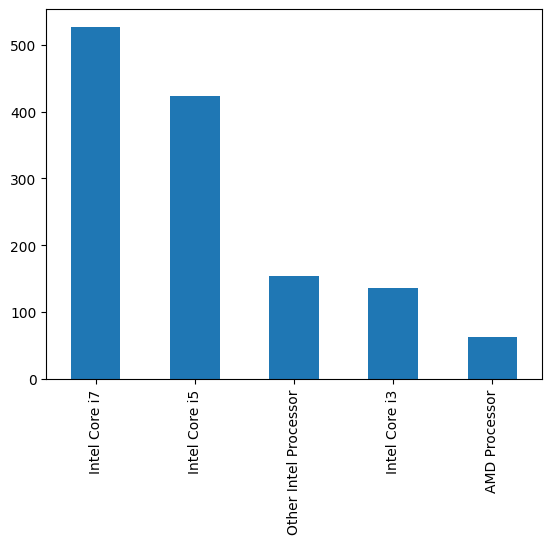

In [63]:
df['CPU Brand'].value_counts().plot(kind = 'bar')

[Text(0, 0, 'Intel Core i5'),
 Text(1, 0, 'Intel Core i7'),
 Text(2, 0, 'AMD Processor'),
 Text(3, 0, 'Intel Core i3'),
 Text(4, 0, 'Other Intel Processor')]

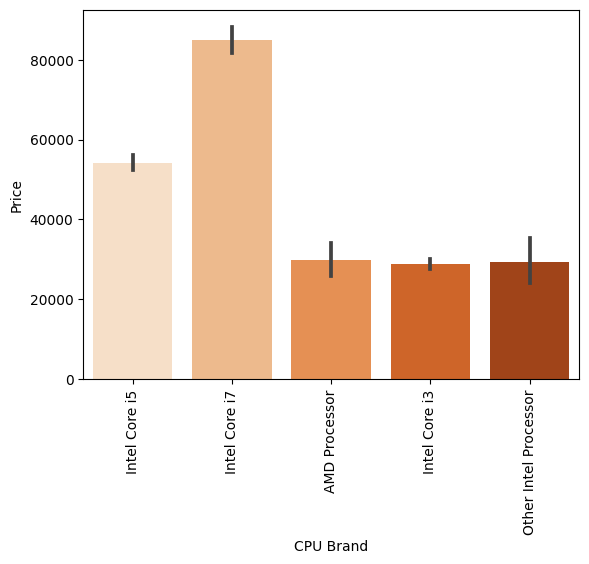

In [64]:
g = sns.barplot(x=df['CPU Brand'],y=df['Price'],palette='Oranges')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<AxesSubplot: >

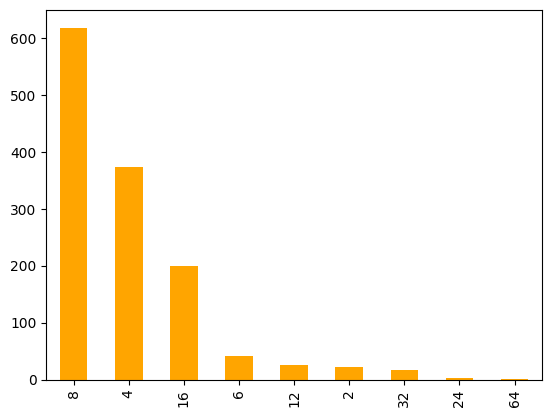

In [65]:
df['RAM'].value_counts().plot(kind = 'bar', color = 'orange')

<AxesSubplot: xlabel='RAM', ylabel='Price'>

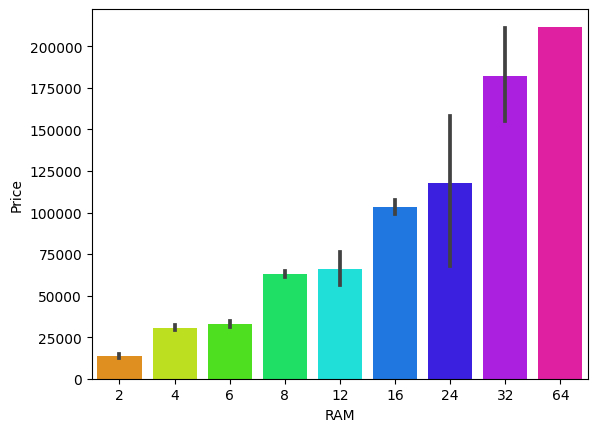

In [66]:
sns.barplot(x=df['RAM'],y=df['Price'],palette='hsv')

In [67]:
df.corr(numeric_only = True)['Price']

RAM            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
PPI            0.475368
SSD            0.670660
HDD           -0.096891
Name: Price, dtype: float64

[Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Nvidia')]

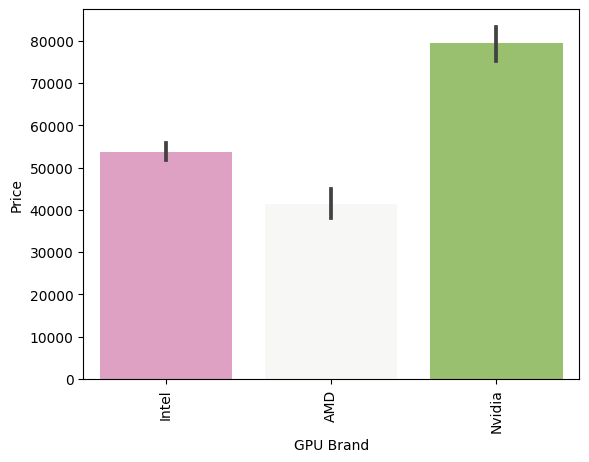

In [68]:
g = sns.barplot(x=df['GPU Brand'],y=df['Price'],palette='PiYG')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'Mac'),
 Text(1, 0, 'Other OS'),
 Text(2, 0, 'Windows'),
 Text(3, 0, 'Linux')]

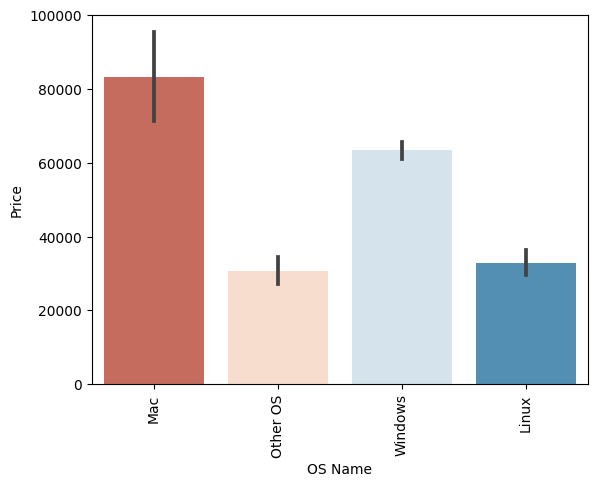

In [69]:
g = sns.barplot(x=df['OS Name'],y=df['Price'],palette='RdBu')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<AxesSubplot: xlabel='Weight', ylabel='Count'>

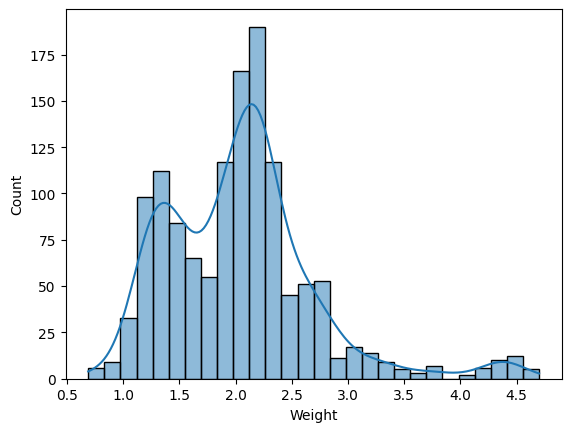

In [70]:
sns.histplot(data = df['Weight'], kde = True)

C:\Users\Dhruv J\AppData\Local\Temp\ipykernel_3820\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

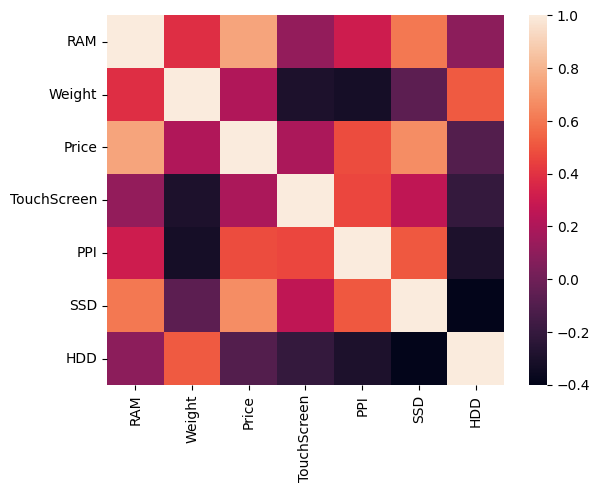

In [71]:
sns.heatmap(df.corr())

<AxesSubplot: xlabel='Price', ylabel='Count'>

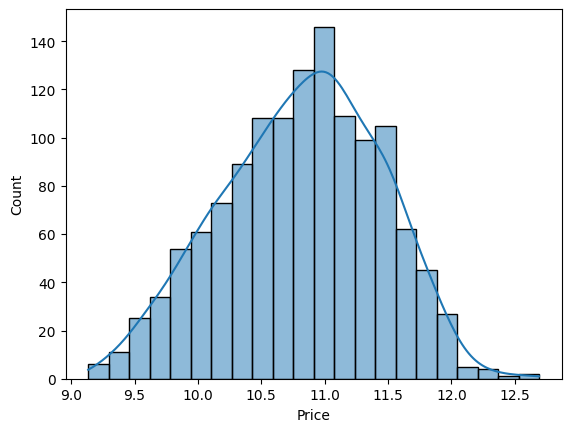

In [72]:
sns.histplot(np.log(df['Price']), kde = True)

# Training Model

In [73]:
x = df.drop(columns = 'Price')
y = np.log(df['Price'])

In [74]:
x

,Company,TypeName,RAM,Weight,TouchScreen,PPI,CPU Brand,SSD,HDD,GPU Brand,OS Name
0,Apple,Ultrabook,8,1.37,0,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,141.211998,Intel Core i5,256,0,Intel,Other OS
3,Apple,Ultrabook,16,1.83,0,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,226.983005,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,157.350512,Intel Core i7,128,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,276.053530,Intel Core i7,512,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,100.454670,Intel Core i7,0,1000,AMD,Windows


In [75]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error

Lets Try Linear Regression

In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder = 'passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 Score - ',r2_score(y_test,y_pred))
print('Mean Absolute Error Score - ',mean_absolute_error(y_test,y_pred))

R2 Score -  0.8007254603988362
Mean Absolute Error Score -  0.2039644251169191


C:\Users\Dhruv J\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Lets Try Decision Tree Regressor

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder = 'passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 Score - ',r2_score(y_test,y_pred))
print('Mean Absolute Error Score - ',mean_absolute_error(y_test,y_pred))

R2 Score -  0.8131956665408525
Mean Absolute Error Score -  0.19329549402550167


C:\Users\Dhruv J\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


We Use Decision Tree due to better accuracy

In [86]:
import pickle
pickle.dump(df,open('df.pkl','wb'))#wb - write binary mode
pickle.dump(pipe,open('pipe.pkl','wb'))

Model Has been exported to Folder to be used for prediction.